## <center>–í—ã–∂–∏–≤—à–∏–µ –Ω–∞ –¢–∏—Ç–∞–Ω–∏–∫–µ</center>

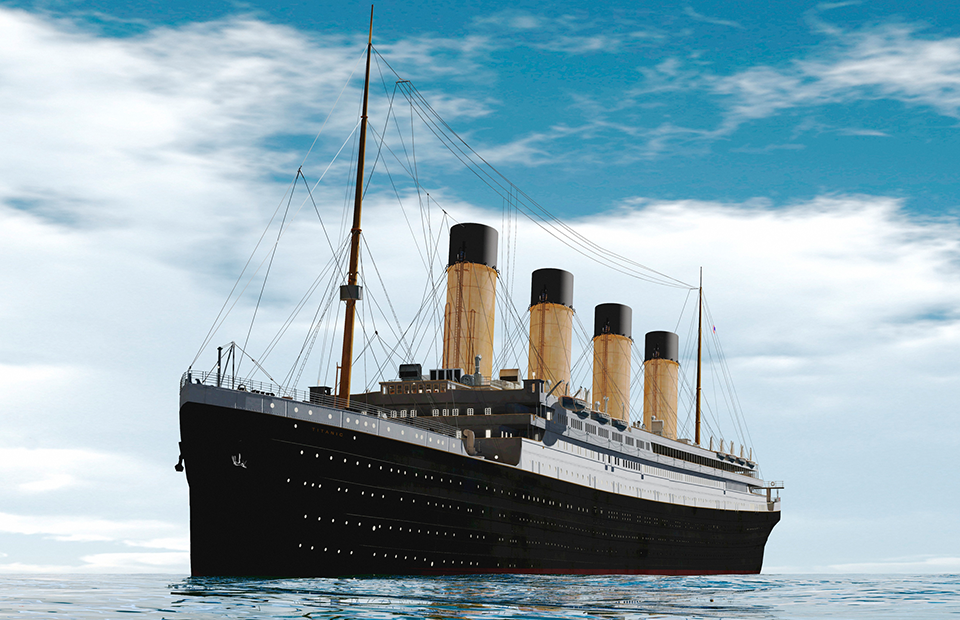

<i>–¶–µ–ª—å—é –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è **–∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –¢–∏—Ç–∞–Ω–∏–∫–∞**, —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–µ—Ç–æ–¥–æ–≤ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.</i>

üìå **–û—Å–Ω–æ–≤–Ω–∞—è –∑–∞–¥–∞—á–∞** ‚Äî –ø–æ—Å—Ç—Ä–æ–∏—Ç—å **–ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω—É—é –º–æ–¥–µ–ª—å**, –ø–æ–∑–≤–æ–ª—è—é—â—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, **–≤—ã–∂–∏–ª –ª–∏ –æ–Ω –≤ –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–µ** –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –ø–∞—Å—Å–∞–∂–∏—Ä–∞ (—Ç–∞–∫–∏—Ö –∫–∞–∫:

- –ø–æ–ª,  
- –≤–æ–∑—Ä–∞—Å—Ç,  
- –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞ –∏ –¥—Ä.)

# –ò–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from feature_engine import encoding as ce
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc

In [300]:
# –§—É–Ω–∫—Ü–∏–∏

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [301]:
data = pd.read_csv('../titanic.csv')
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375    B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500   C22        S   11    NaN   
2   2.0000      1      2  113781  151.5500   C22        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500   C22        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500   C22        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

- `pclass` ‚Äî –ö–ª–∞—Å—Å –ø–∞—Å—Å–∞–∂–∏—Ä–∞ (1, 2 –∏–ª–∏ 3), –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å–æ—Ü–∏–∞–ª—å–Ω—ã–π —Å—Ç–∞—Ç—É—Å –∏ —É—Ä–æ–≤–µ–Ω—å –∫–æ–º—Ñ–æ—Ä—Ç–∞ –Ω–∞ –±–æ—Ä—Ç—É.

- `survived` ‚Äî –í—ã–∂–∏–ª –ª–∏ –ø–∞—Å—Å–∞–∂–∏—Ä (1 ‚Äî –≤—ã–∂–∏–ª, 0 ‚Äî –Ω–µ –≤—ã–∂–∏–ª).

- `name` ‚Äî –ò–º—è –ø–∞—Å—Å–∞–∂–∏—Ä–∞.

- `sex` ‚Äî –ü–æ–ª –ø–∞—Å—Å–∞–∂–∏—Ä–∞ (–º—É–∂—á–∏–Ω–∞ –∏–ª–∏ –∂–µ–Ω—â–∏–Ω–∞).

- `age` ‚Äî –í–æ–∑—Ä–∞—Å—Ç –ø–∞—Å—Å–∞–∂–∏—Ä–∞.

- `sibsp` ‚Äî –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—Ä–∞—Ç—å–µ–≤/—Å–µ—Å—Ç–µ—Ä –∏–ª–∏ —Å—É–ø—Ä—É–≥–æ–≤ –Ω–∞ –±–æ—Ä—Ç—É.

- `parch` ‚Äî –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–æ–¥–∏—Ç–µ–ª–µ–π –∏–ª–∏ –¥–µ—Ç–µ–π –Ω–∞ –±–æ—Ä—Ç—É.

- `ticket` ‚Äî –ù–æ–º–µ—Ä –±–∏–ª–µ—Ç–∞.

- `fare` ‚Äî –°—Ç–æ–∏–º–æ—Å—Ç—å –±–∏–ª–µ—Ç–∞.

- `cabin` ‚Äî –ù–æ–º–µ—Ä –∫–∞—é—Ç—ã, –µ—Å–ª–∏ –ø–∞—Å—Å–∞–∂–∏—Ä –±—ã–ª —Ä–∞–∑–º–µ—â–µ–Ω –≤ –∫–∞—é—Ç–µ.

- `embarked` ‚Äî –ü–æ—Ä—Ç –ø–æ—Å–∞–¥–∫–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–∞ (C ‚Äî Cherbourg, Q ‚Äî Queenstown, S ‚Äî Southampton).

- `boat` ‚Äî –ù–æ–º–µ—Ä —Å–ø–∞—Å–∞—Ç–µ–ª—å–Ω–æ–π —à–ª—é–ø–∫–∏, –≤ –∫–æ—Ç–æ—Ä–æ–π –ø–∞—Å—Å–∞–∂–∏—Ä –æ–∫–∞–∑–∞–ª—Å—è (–µ—Å–ª–∏ –±—ã–ª —Å–ø–∞—Å–µ–Ω).

- `body` ‚Äî –ù–æ–º–µ—Ä —Ç–µ–ª–∞, –µ—Å–ª–∏ –ø–∞—Å—Å–∞–∂–∏—Ä –±—ã–ª –Ω–∞–π–¥–µ–Ω –ø–æ—Å–ª–µ –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ—ã.

- `home.dest` ‚Äî –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –¥–æ–º–∞ –∏–ª–∏ –∫–æ–Ω–µ—á–Ω—ã–π –ø—É–Ω–∫—Ç –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Å—Å–∞–∂–∏—Ä–∞.

# –ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞—Å–µ—Ç–∞

## –ö—Ä–∞—Ç–∫–∏–π –∞–Ω–∞–ª–∏–∑ –î–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- **–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:** 1309 –∑–∞–ø–∏—Å–µ–π –∏ 14 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
- **–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:**
  - `age` ‚Äî 263 –ø—Ä–æ–ø—É—Å–∫–∞ ‚Üí –≤–∞–∂–Ω—ã–π —á–∏—Å–ª–æ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ–¥–∏–∞–Ω–æ–π –∏–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤).
  - `fare` ‚Äî –≤—Å–µ–≥–æ 1 –ø—Ä–æ–ø—É—Å–∫ ‚Üí –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –º–µ–¥–∏–∞–Ω–æ–π.
  - `cabin` ‚Äî –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (–±–æ–ª–µ–µ 75%) ‚Üí –ª–∏–±–æ —É–¥–∞–ª–∏—Ç—å, –ª–∏–±–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ "–µ—Å—Ç—å/–Ω–µ—Ç".
  - `embarked` ‚Äî 2 –ø—Ä–æ–ø—É—Å–∫–∞ ‚Üí –º–æ–∂–Ω–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º.
  - `boat`, `body`, `home.dest` ‚Äî –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å –æ—Å—Ç–æ—Ä–æ–∂–Ω–æ—Å—Ç—å—é –∏–ª–∏ –≤–æ–≤—Å–µ –∏—Å–∫–ª—é—á–∏—Ç—å.
- **–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:**
  - `pclass`, `survived`, `sibsp`, `parch` ‚Äî —á–∏—Å–ª–æ–≤—ã–µ, –Ω–æ –æ—Ç—Ä–∞–∂–∞—é—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é –∏–ª–∏ –±—É–ª–µ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.
  - `name`, `ticket`, `cabin`, `home.dest` ‚Äî —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–∂–Ω–æ –∏–∑–≤–ª–µ—á—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ–∏—á–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–∏—Ç—É–ª –∏–∑ `name`).
  - `sex`, `embarked` ‚Äî –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –ø–æ—Ç—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, one-hot).
- **–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è:** `survived` ‚Äî –±–∏–Ω–∞—Ä–Ω–∞—è (0/1), –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∑–∞–¥–∞—á –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

**–í—ã–≤–æ–¥:**  
–ü–µ—Ä–µ–¥ –Ω–∞—á–∞–ª–æ–º –∞–Ω–∞–ª–∏–∑–∞ –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö: –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∞ —Ç–∞–∫–∂–µ, –≤–æ–∑–º–æ–∂–Ω–æ, —É–¥–∞–ª–µ–Ω–∏–µ –∏–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤.


## –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫

In [303]:
data.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

- –í–æ–∑—Ä–∞—Å—Ç –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç –º–ª–∞–¥–µ–Ω—Ü–µ–≤ –¥–æ –ø–æ–∂–∏–ª—ã—Ö –ª—é–¥–µ–π, —Å —Å—Ä–µ–¥–Ω–µ–π –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø–æ–π –æ–∫–æ–ª–æ 30 –ª–µ—Ç.

- 38% –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –≤—ã–∂–∏–ª–∏, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–º –¥–∞–Ω–Ω—ã–º –æ –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–µ.

- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –ø—É—Ç–µ—à–µ—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –æ–¥–∏–Ω–æ—á–∫—É.

- –°—Ç–æ–∏–º–æ—Å—Ç—å –±–∏–ª–µ—Ç–∞ –∏–º–µ–µ—Ç —à–∏—Ä–æ–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ä–∞–∑–Ω—ã–π —Å–æ—Ü–∏–∞–ª—å–Ω—ã–π —Å—Ç–∞—Ç—É—Å –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤.

- –í —Å—Ç–æ–ª–±—Ü–µ `body` –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –º–µ–Ω–µ–µ –ø–æ–ª–µ–∑–Ω—ã–º –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞.

–°–ª–µ–¥—É–µ—Ç –ø—Ä–æ–≤–µ—Å—Ç–∏ –æ–±—Ä–∞–±–æ—Ç–∫—É –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Å—Ç–æ–ª–±—Ü–µ `age`, –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

# –ê–Ω–∞–ª–∏–∑ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [304]:
data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

- –°—Ç–æ–ª–±—Ü—ã —Å –Ω—É–ª–µ–≤—ã–º–∏ –ø—Ä–æ–ø—É—Å–∫–∞–º–∏: `pclass`, `survived`, `name`, `sex`, `sibsp`, `parch`, `ticket`, `fare`, `embarked`.

- –°—Ç–æ–ª–±–µ—Ü age –∏–º–µ–µ—Ç 0.2% –ø—Ä–æ–ø—É—Å–∫–æ–≤, —á—Ç–æ –º–æ–∂–Ω–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã.

- `cabin` –∏–º–µ–µ—Ç 77.5% –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–∫–ª—é—á–µ–Ω –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –∏–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω —Å –ø–æ–º–æ—â—å—é –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤.

- `boat` –∏ `body` –∏–º–µ—é—Ç –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ (62.9% –∏ 90.8% —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ), —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Ö –º–µ–Ω–µ–µ –ø–æ–ª–µ–∑–Ω—ã–º–∏.

- `home.dest` –∏–º–µ–µ—Ç 43.1% –ø—Ä–æ–ø—É—Å–∫–æ–≤, —Ç—Ä–µ–±—É–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

**–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö —Å –Ω–µ–±–æ–ª—å—à–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∞ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `cabin` –∏ `body`) ‚Äî –ø—Ä–∏–Ω—è—Ç—å —Ä–µ—à–µ–Ω–∏–µ –æ–± –∏—Å–∫–ª—é—á–µ–Ω–∏–∏ –∏–ª–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ.**

## –¢–∏–ø—ã –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [305]:
discrete = [var for var in data.columns if data[var].dtype != 'O' and var != 'survived' and data[var].nunique() < 10]
continuous = [var for var in data.columns if data[var].dtype != 'O' and var != 'survived' and var not in discrete]

mixed = ['cabin']
categorical = [var for var in data.columns if data[var].dtype == 'O' and var not in mixed]

print(f"There are {len(discrete)} descrete variables")
print(f"There are {len(continuous)} continuous variables")
print(f"There are {len(categorical)} categorical variables")
print(f"There are {len(mixed)} mixed variables")

There are 3 descrete variables
There are 3 continuous variables
There are 6 categorical variables
There are 1 mixed variables


In [306]:
discrete

['pclass', 'sibsp', 'parch']

In [307]:
continuous

['age', 'fare', 'body']

In [308]:
categorical

['name', 'sex', 'ticket', 'embarked', 'boat', 'home.dest']

In [309]:
mixed

['cabin']

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏ –∏—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

## BoxPlot –ø–æ –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º

<Axes: >

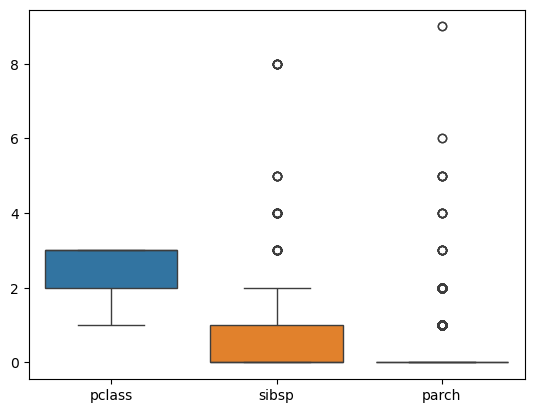

In [310]:
discrete = ['pclass', 'sibsp', 'parch']
sns.boxplot(data[discrete])

**–ë–æ–∫—Å–ø–ª–æ—Ç—ã –ø–æ –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –ø–æ–∑–≤–æ–ª—è—é—Ç –≤—ã—è–≤–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ `sibsp`, `parch` –º–æ–≥—É—Ç –∏–º–µ—Ç—å –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.**

## BoxPlot –ø–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º

<Axes: >

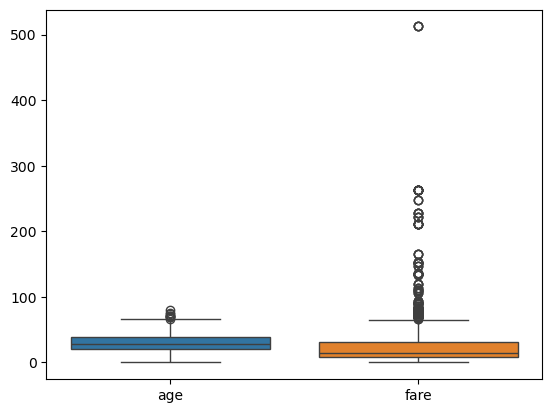

In [311]:
continuous = ['age', 'fare']
sns.boxplot(data[continuous])

**Boxplot –ø–æ `fare` –∏ `age` –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã–±—Ä–æ—Å—ã, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ `fare`, —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è.**

## –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã

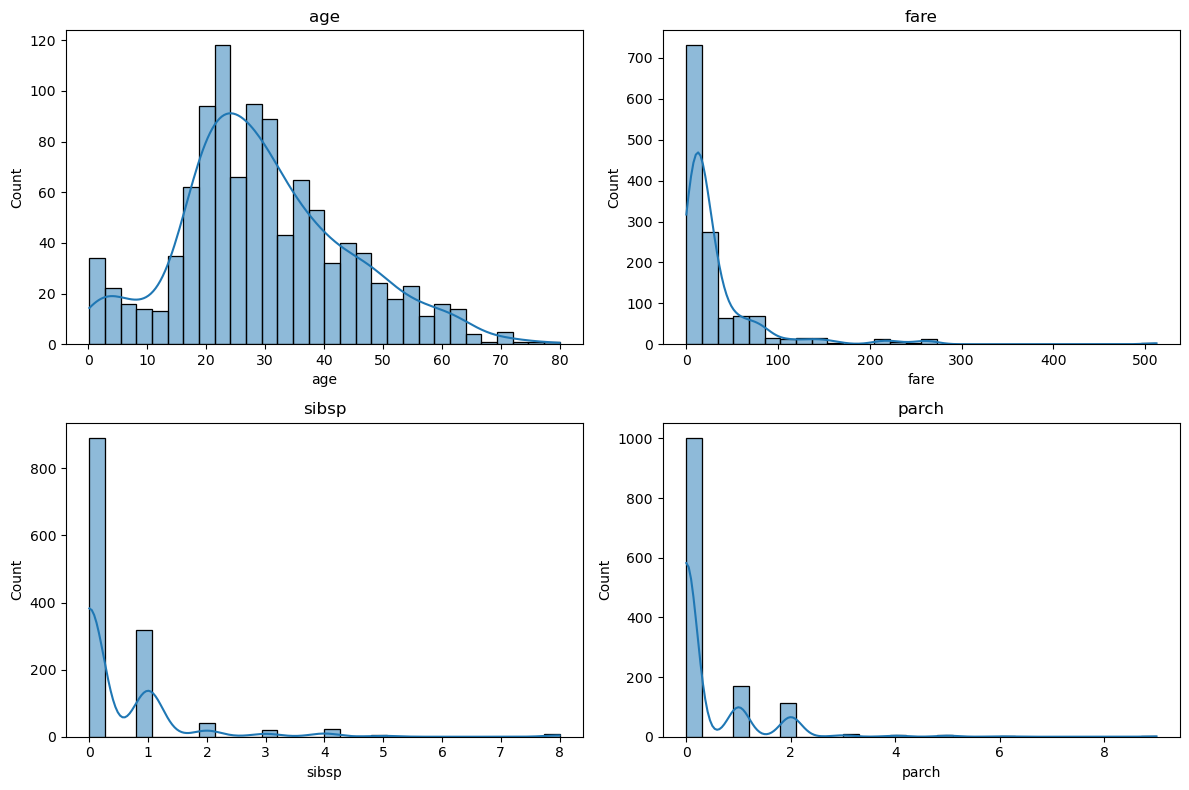

In [312]:
num_features = ['age', 'fare', 'sibsp', 'parch']

plt.figure(figsize = (12, 8))
for idx, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data[feature], kde = True, bins = 30)
    plt.title(f"{feature}")
plt.tight_layout()
plt.show()

- `age` : –≤–æ–∑—Ä–∞—Å—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω —Å –ø–∏–∫–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–µ–π –≤–æ–∫—Ä—É–≥ 20-40 –ª–µ—Ç, —Å –Ω–µ–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ—á–µ–Ω—å –º–æ–ª–æ–¥—ã—Ö –∏ —Å—Ç–∞—Ä—ã—Ö –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤.

- `fare` : —Å—Ç–æ–∏–º–æ—Å—Ç—å –±–∏–ª–µ—Ç–æ–≤ –∏–º–µ–µ—Ç —à–∏—Ä–æ–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω, —Å –ø–∏–∫–æ–º –≤ –±–æ–ª–µ–µ –Ω–∏–∑–∫–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ, –Ω–æ —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –≤—ã—Å–æ–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

- `sibsp` : –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –ø—É—Ç–µ—à–µ—Å—Ç–≤–æ–≤–∞–ª–∏ –±–µ–∑ –±—Ä–∞—Ç—å–µ–≤/—Å–µ—Å—Ç–µ—Ä –∏–ª–∏ —Å—É–ø—Ä—É–≥–æ–≤, —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ª—é–¥–µ–π, –ø—É—Ç–µ—à–µ—Å—Ç–≤—É—é—â–∏—Ö —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º–∏.

- `parch` : –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –Ω–µ –∏–º–µ–ª–∏ –¥–µ—Ç–µ–π –∏–ª–∏ —Ä–æ–¥–∏—Ç–µ–ª–µ–π, —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –ª—é–¥—å–º–∏, –ø—É—Ç–µ—à–µ—Å—Ç–≤—É—é—â–∏–º–∏ —Å —Å–µ–º—å–µ–π.

**–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–º–µ—é—Ç —Ä–∞–∑–ª–∏—á–Ω—É—é —Ñ–æ—Ä–º—É –∏ —à–∏—Ä–∏–Ω—É. –Ø–≤–Ω—ã–µ –ø–∏–∫–∏ –≤ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –∏–ª–∏ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã, —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—â–∏–µ—Å—è –æ—Ç –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å—ã –¥–∞–Ω–Ω—ã—Ö, –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –Ω–µ–æ–±—ã—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.**

# Barplot

## Pclass & Survived

In [313]:
data.pclass.value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [314]:
data[['pclass', 'survived']].groupby(['pclass'], as_index = False).sum()

pclass  survived
0       1       200
1       2       119
2       3       181

<Axes: xlabel='pclass', ylabel='survived'>

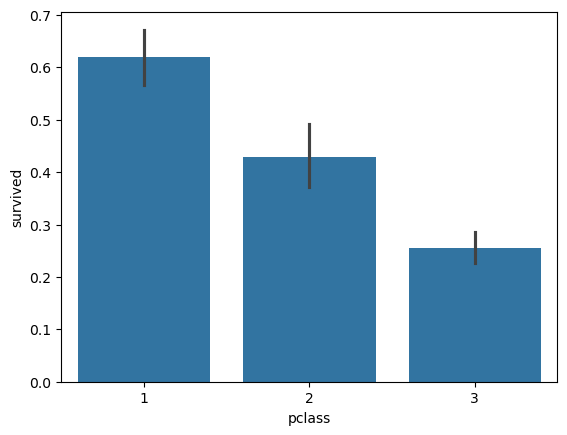

In [315]:
sns.barplot(data = data, x = "pclass", y = "survived")

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –Ω–∞–∏–±–æ–ª—å—à–∞—è –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å –≤ –ø–µ—Ä–≤–æ–º –∫–ª–∞—Å—Å–µ 

## Sex & Survived

In [316]:
data.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [317]:
data[['sex', 'survived']].groupby(['sex'], as_index = False).sum()

sex  survived
0  female       339
1    male       161

<Axes: xlabel='sex', ylabel='survived'>

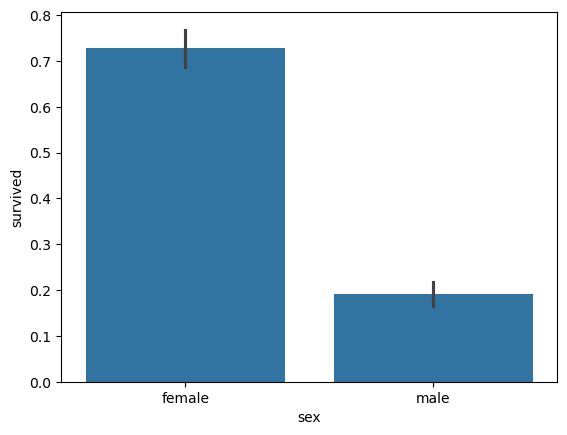

In [318]:
sns.barplot(x = 'sex', y = 'survived', data = data)

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–∏ –º—ã –Ω–∞–≥–ª—è–¥–Ω–æ –≤–∏–¥–∏–º, —á—Ç–æ —É –∂–µ–Ω—â–∏–Ω –≤—ã—Å–æ–∫–∞—è –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å 

# Age & Survived

In [319]:
data.age.value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
25.0000    34
28.0000    32
36.0000    31
26.0000    30
29.0000    30
27.0000    30
19.0000    29
23.0000    26
32.0000    24
31.0000    23
35.0000    23
20.0000    23
45.0000    21
33.0000    21
39.0000    20
17.0000    20
16.0000    19
42.0000    18
40.0000    18
34.0000    16
50.0000    15
38.0000    14
48.0000    14
47.0000    14
2.0000     12
41.0000    11
44.0000    10
54.0000    10
1.0000     10
9.0000     10
4.0000     10
43.0000     9
37.0000     9
49.0000     9
51.0000     8
14.0000     8
55.0000     8
60.0000     7
3.0000      7
15.0000     6
46.0000     6
8.0000      6
6.0000      6
52.0000     6
58.0000     6
62.0000     5
57.0000     5
61.0000     5
5.0000      5
13.0000     5
64.0000     5
11.0000     4
53.0000     4
10.0000     4
32.5000     4
7.0000      4
56.0000     4
63.0000     4
0.7500      3
18.5000     3
59.0000     3
28.5000     3
65.0000     3
40.5000     3
12.0000     3
0.8333      3
34

In [320]:
data['age'].isnull().mean()

np.float64(0.20091673032849502)

In [321]:
data[['age', 'survived']].groupby(['age'], as_index = False).sum()

age  survived
0    0.1667         1
1    0.3333         0
2    0.4167         1
3    0.6667         1
4    0.7500         2
5    0.8333         3
6    0.9167         2
7    1.0000         7
8    2.0000         4
9    3.0000         5
10   4.0000         7
11   5.0000         4
12   6.0000         3
13   7.0000         2
14   8.0000         4
15   9.0000         4
16  10.0000         0
17  11.0000         1
18  11.5000         0
19  12.0000         3
20  13.0000         3
21  14.0000         4
22  14.5000         0
23  15.0000         5
24  16.0000         8
25  17.0000         7
26  18.0000        14
27  18.5000         0
28  19.0000        11
29  20.0000         8
30  20.5000         0
31  21.0000        11
32  22.0000        20
33  22.5000         0
34  23.0000        10
35  23.5000         0
36  24.0000        22
37  24.5000         0
38  25.0000        11
39  26.0000        11
40  26.5000         0
41  27.0000        13
42  28.0000         8
43  28.5000         0
44  29.0000        13
45  30.0000        15
46  30.5000         0
47  31.0000        12
48  32.0000        11
49  32.5000         1
50  33.0000         9
51  34.0000         6
52  34.5000         0
53  35.0000        13
54  36.0000        14
55  36.5000         1
56  37.0000         2
57  38.0000         6
58  38.5000         0
59  39.0000         8
60  40.0000         6
61  40.5000         0
62  41.0000         2
63  42.0000         6
64  43.0000         3
65  44.0000         3
66  45.0000        14
67  45.5000         0
68  46.0000         0
69  47.0000         3
70  48.0000        10
71  49.0000         5
72  50.0000         6
73  51.0000         3
74  52.0000         3
75  53.0000         4
76  54.0000         5
77  55.0000         4
78  55.5000         0
79  56.0000         2
80  57.0000         0
81  58.0000         4
82  59.0000         1
83  60.0000         4
84  60.5000         0
85  61.0000         0
86  62.0000         2
87  63.0000         2
88  64.0000         2
89  65.0000         0
90  66.0000         0
91  67.0000         0
92  70.0000         0
93  70.5000         0
94  71.0000         0
95  74.0000         0
96  76.0000         1
97  80.0000         1

In [322]:
data['age_group'] = pd.cut(data['age'], 4)
print(data[['age_group', 'survived']].groupby(['age_group'], as_index = False, observed = False).mean())

          age_group  survived
0  (0.0869, 20.125]  0.459677
1  (20.125, 40.083]  0.390543
2  (40.083, 60.042]  0.422680
3    (60.042, 80.0]  0.242424


<Axes: xlabel='age_group', ylabel='survived'>

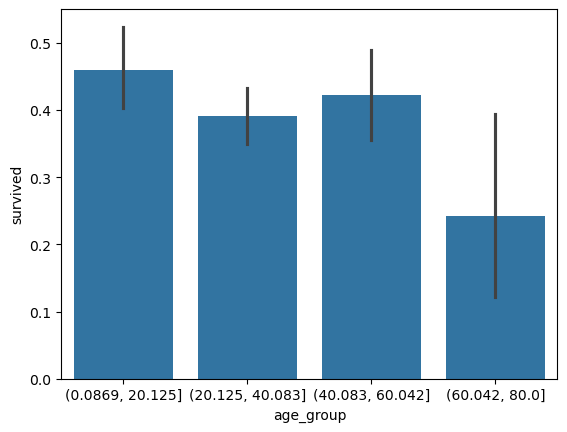

In [323]:
sns.barplot(x = 'age_group', y = 'survived', data = data)

In [324]:
data['age'].isnull().mean()

np.float64(0.20091673032849502)

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–∏ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤—ã–∂–∏–≤–∞–ª–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ª—é–¥–∏ –¥–æ –ø–æ–∂–∏–ª–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞.–í –æ—Å–Ω–æ–≤–Ω–æ–º —ç—Ç–æ –¥–µ—Ç–∏ –∏ –º—ã –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –ª—é–¥–∏ –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –≤ —Å–æ—Å—Ç–∞–≤–µ —Å–µ–º—å–∏ –∏–ª–∏ —Å—É–ø—Ä—É–≥–æ–≤.

# SibSp, Parch & Survived

In [325]:
data.sibsp.value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [326]:
data[['sibsp', 'survived']].groupby(['sibsp'], as_index = False).sum()

sibsp  survived
0      0       309
1      1       163
2      2        19
3      3         6
4      4         3
5      5         0
6      8         0

<Axes: xlabel='sibsp', ylabel='survived'>

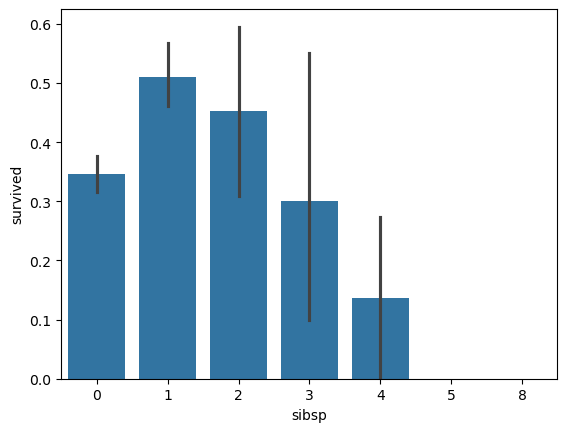

In [327]:
sns.barplot(x = 'sibsp', y = 'survived', data = data)

In [328]:
data.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [329]:
data[['parch', 'survived']].groupby(['parch'], as_index = False).sum()

parch  survived
0      0       336
1      1       100
2      2        57
3      3         5
4      4         1
5      5         1
6      6         0
7      9         0

<Axes: xlabel='parch', ylabel='survived'>

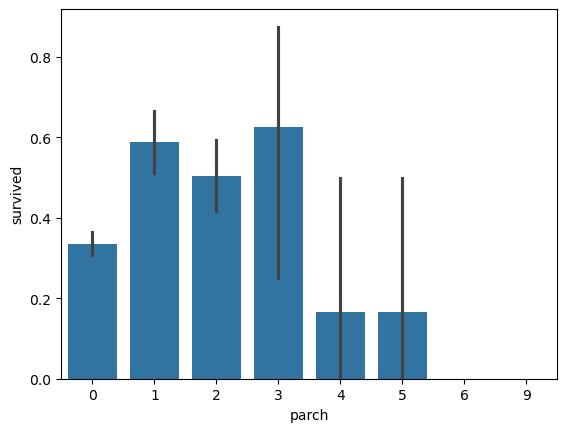

In [330]:
sns.barplot(x = 'parch', y = 'survived', data = data)

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–∏ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ —É —á–µ–ª–æ–≤–µ–∫–∞ –±—ã–ª–∞ –≤—ã—Å–æ–∫–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã–∂–∏–≤–∞–Ω–∏—è –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –Ω–∞ –±–æ—Ä—Ç—É –æ—Ç 1-3 —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤, –Ω–æ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∞—è, –µ—Å–ª–∏ —É —á–µ–ª–æ–≤–µ–∫–∞ –±—ã–ª–æ –±–æ–ª—å—à–µ 3 —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –∏–ª–∏ –∂–µ –µ—Å–ª–∏ –æ–Ω –≤–æ–≤—Å–µ –ø—É—Ç–µ—à–µ—Å—Ç–≤–æ–≤–∞–ª –≤ –æ–¥–∏–Ω–æ—á–∫—É (–∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞–µ–≤ —Å 4 –∏ –±–æ–ª–µ–µ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º–∏).

# Embarked & Survived

In [331]:
data.embarked.value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [332]:
data[['embarked', 'survived']].groupby(['embarked'], as_index = False).sum()

embarked  survived
0        C       150
1        Q        44
2        S       304

<Axes: xlabel='embarked', ylabel='survived'>

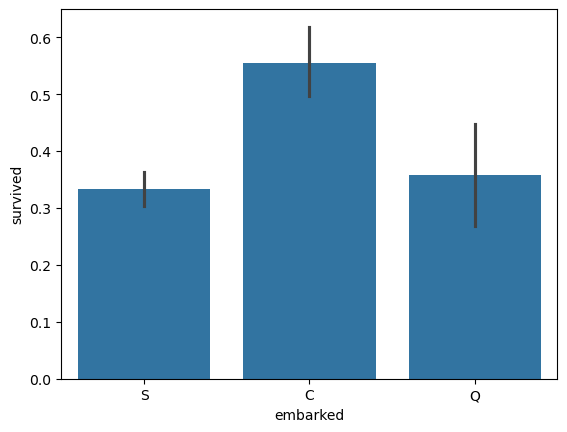

In [333]:
sns.barplot(x = 'embarked', y = 'survived', data = data)

### –ò—Å—Ö–æ–¥—è –∏–∑ –¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø–æ—Å—Å–∞–∂–∏—Ä—ã —Å–µ–≤—à–∏–µ –Ω–∞ –±–æ—Ä—Ç –≤ –ø–æ—Ä—Ç—É `C` –∏ `Q` –∏–º–µ–ª–∏ –±–æ–ª—å—à–∏–π —à–∞–Ω—Å –Ω–∞ –≤—ã–∂–∏–≤–∞–µ–Ω–∏–µ, –Ω–µ–∂–µ–ª–∏ –ø–∞—Å—Å–∞–∂–∏—Ä—ã —Å–µ–≤—à–∏–µ –Ω–∞ –±–æ—Ä—Ç –≤ –ø–æ—Ä—Ç—É `S`

# Cabin & Survived

In [334]:
data.cabin.value_counts().head()

cabin
F      8
C23    6
B57    5
G6     5
C22    4
Name: count, dtype: int64

In [335]:
data['cabin_tmp'] = data['cabin'].str.extract('([A-Za-z]+)')
data['cabin_tmp'].head()

0    B
1    C
2    C
3    C
4    C
Name: cabin_tmp, dtype: object

In [336]:
data.fillna({'cabin_tmp': 'nan'}, inplace=True)
data['cabin_tmp'].unique()

array(['B', 'C', 'E', 'D', 'A', 'nan', 'T', 'F', 'G'], dtype=object)

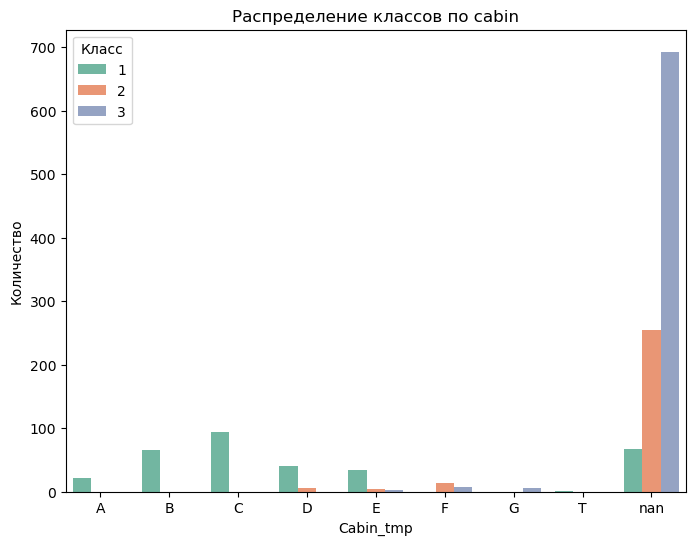

In [337]:
plt.figure(figsize=(8, 6))

order = sorted(data['cabin_tmp'].unique())
sns.countplot(data=data, x='cabin_tmp', hue='pclass', palette='Set2', order=order)

plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –ø–æ cabin")
plt.xlabel("Cabin_tmp")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.legend(title="–ö–ª–∞—Å—Å")
plt.show()

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–∏ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–æ–º–µ—Ä –∫–∞—é—Ç—ã –±—ã–ª –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —É –ª—é–¥–µ–π –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—Ö–æ–¥–∏–ª–∏—Å—å –≤ 1 –∫–ª–∞—Å—Å–µ, –∞ —É –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ 2 –∏ 3 –∫–ª–∞—Å—Å–∞ –Ω–æ–º–µ—Ä –∫–∞—é—Ç—ã –±—ã–ª –Ω–µ –∏–∑–≤–µ—Å—Ç–µ–Ω.

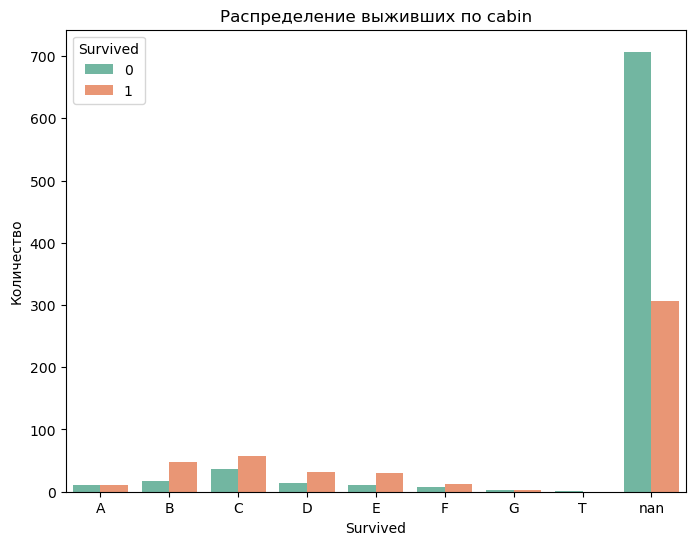

In [338]:
plt.figure(figsize=(8, 6))
order = sorted(data['cabin_tmp'].unique())
sns.countplot(data=data, x='cabin_tmp', hue='survived', palette='Set2', order=order)

plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–∂–∏–≤—à–∏—Ö –ø–æ cabin")
plt.xlabel("Survived")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.legend(title="Survived")
plt.show()

In [339]:
data['cabin_known'] = data['cabin'].notnull().astype(int)

In [340]:
data['cabin_tmp'] = data['cabin_tmp'].replace({
    'A': 'ABC', 
    'B': 'ABC',
    'C': 'ABC',
    'D': 'DE',
    'E': 'DE',
    'F': 'FG',
    'G': 'FG',
    'T': 'nan'
})

data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375    B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500   C22        S   11    NaN   
2   2.0000      1      2  113781  151.5500   C22        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500   C22        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500   C22        S  NaN    NaN   

                         home.dest         age_group cabin_tmp  cabin_known  
0                     St Louis, MO  (20.125, 40.083]       ABC            1  
1  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC            1  
2  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC            1  
3  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC            1  
4  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC            1

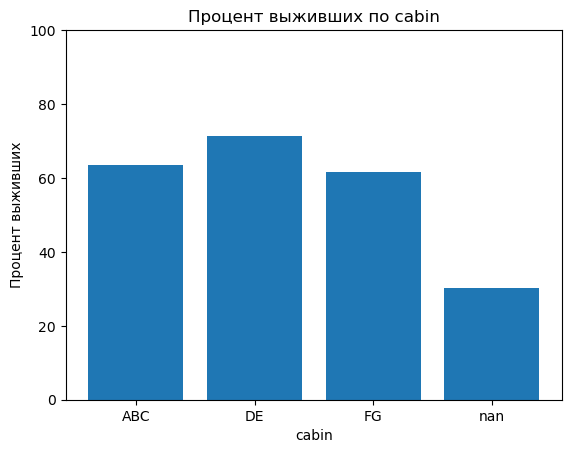

In [341]:
survival_by_letter = data.groupby('cabin_tmp')['survived'].mean().sort_index() * 100

plt.bar(survival_by_letter.index, survival_by_letter.values)
plt.xlabel('cabin')
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–∂–∏–≤—à–∏—Ö')
plt.title('–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–∂–∏–≤—à–∏—Ö –ø–æ cabin')
plt.ylim(0, 100) 
plt.show()

### –ò—Å—Ö–æ–¥—è –∏–∑ –¥–≤—É—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Ç–∞–∫ –∏–ª–∏ –∏–Ω–∞—á–µ –Ω–∞–ª–∏—á–∏–µ –Ω–æ–º–µ—Ä–∞ –∫–∞—é—Ç—ã –Ω–µ–º–Ω–æ–≥–æ –Ω–æ –≤–ª–∏—è–ª–æ –Ω–∞ —à–∞–Ω—Å –≤—ã–∂–∏–≤–∞–Ω–∏—è.

# Fare & Survived

In [342]:
data[['fare', 'survived']].groupby(['fare'], as_index = False).sum()

fare  survived
0      0.0000         2
1      3.1708         1
2      4.0125         0
3      5.0000         0
4      6.2375         0
5      6.4375         0
6      6.4500         0
7      6.4958         0
8      6.7500         0
9      6.8583         0
10     6.9500         1
11     6.9750         1
12     7.0000         1
13     7.0458         0
14     7.0500         1
15     7.0542         0
16     7.1250         0
17     7.1417         1
18     7.2250         5
19     7.2292         7
20     7.2500         1
21     7.2833         0
22     7.3125         0
23     7.4958         1
24     7.5208         0
25     7.5500         2
26     7.5750         0
27     7.5792         1
28     7.6292         0
29     7.6500         3
30     7.7208         1
31     7.7250         1
32     7.7292         0
33     7.7333         3
34     7.7375         1
35     7.7417         0
36     7.7500        17
37     7.7750         7
38     7.7792         1
39     7.7875         1
40     7.7958         5
41     7.8000         0
42     7.8208         1
43     7.8292         1
44     7.8500         0
45     7.8542         4
46     7.8750         0
47     7.8792         4
48     7.8875         1
49     7.8958         1
50     7.9250         9
51     8.0292         1
52     8.0500         9
53     8.1125         1
54     8.1375         0
55     8.1583         0
56     8.3000         0
57     8.3625         0
58     8.4042         0
59     8.4333         0
60     8.4583         0
61     8.5167         2
62     8.6542         0
63     8.6625         1
64     8.6833         1
65     8.7125         0
66     8.8500         0
67     8.9625         1
68     9.0000         0
69     9.2167         0
70     9.2250         1
71     9.3250         0
72     9.3500         2
73     9.4750         0
74     9.4833         0
75     9.5000         3
76     9.5875         1
77     9.6875         0
78     9.8250         0
79     9.8375         0
80     9.8417         1
81     9.8458         0
82    10.1708         0
83    10.4625         0
84    10.5000        12
85    10.5167         0
86    10.7083         0
87    11.1333         3
88    11.2417         2
89    11.5000         0
90    12.0000         1
91    12.1833         0
92    12.2750         0
93    12.2875         2
94    12.3500         2
95    12.4750         4
96    12.5250         0
97    12.6500         1
98    12.7375         1
99    12.8750         0
100   13.0000        17
101   13.4167         2
102   13.5000         2
103   13.7750         0
104   13.7917         1
105   13.8583         3
106   13.8625         2
107   13.9000         1
108   14.0000         0
109   14.1083         1
110   14.4000         0
111   14.4542         1
112   14.4583         0
113   14.5000         2
114   15.0000         0
115   15.0333         0
116   15.0458         0
117   15.0500         0
118   15.1000         0
119   15.2458         6
120   15.5000         4
121   15.5500         0
122   15.5792         0
123   15.7417         3
124   15.7500         2
125   15.8500         2
126   15.9000         3
127   16.0000         1
128   16.1000         3
129   16.7000         3
130   17.4000         2
131   17.8000         0
132   18.0000         0
133   18.7500         3
134   18.7875         1
135   19.2583         4
136   19.5000         2
137   19.9667         0
138   20.2125         0
139   20.2500         1
140   20.5250         2
141   20.5750         3
142   21.0000         5
143   21.0750         0
144   21.6792         0
145   22.0250         3
146   22.3583         3
147   22.5250         0
148   23.0000         7
149   23.2500         3
150   23.4500         0
151   24.0000         1
152   24.1500         1
153   25.4667         0
154   25.5875         0
155   25.7000         1
156   25.7417         1
157   25.9250         0
158   25.9292         2
159   26.0000        19
160   26.2500         4
161   26.2833         1
162   26.2875         3
163   26.3875         1
164   26.5500        10
165   27.0000         1
1

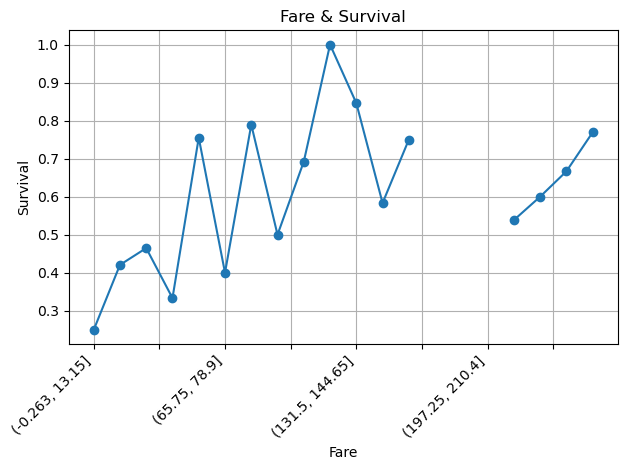

In [343]:
data = data[data['fare'] < 300].copy()
data['fare_bin'] = pd.cut(data['fare'], bins=20)

fare_survival = data.groupby('fare_bin', observed=False)['survived'].mean()

fare_survival.plot(kind='line', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Fare & Survival')
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.grid()
plt.tight_layout()
plt.show()

### –î–∞–Ω–Ω–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–æ –Ω–∞ —Ü–µ–Ω–µ –±–∏–ª–µ—Ç–∞ –∑–∞ –∫–∞—é—Ç—É, –∞ –Ω–µ –∑–∞ –æ–¥–Ω–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞, –ø–æ–ø—Ä–æ–±—É–µ–º –≤—ã–≤–µ—Å—Ç–∏ –ø—Ä–∏–º–µ—Ä–Ω—É—é —Ü–µ–Ω—É –±–∏–ª–µ—Ç –Ω–∞ 1 —á–µ–ª–æ–≤–µ–∫–∞ –∏ —Å–¥–µ–ª–∞—Ç—å –¥–∞–ª—å–Ω–µ–π—à–∏–µ –≤—ã–≤–æ–¥—ã.

In [344]:
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['alone'] = (data['sibsp'] + data['parch']) == 0

In [345]:
data['fare_per_prsn'] = data['fare'] / data['family_size']
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare cabin  ... boat   body  \
0  29.0000      0      0   24160  211.3375    B5  ...    2    NaN   
1   0.9167      1      2  113781  151.5500   C22  ...   11    NaN   
2   2.0000      1      2  113781  151.5500   C22  ...  NaN    NaN   
3  30.0000      1      2  113781  151.5500   C22  ...  NaN  135.0   
4  25.0000      1      2  113781  151.5500   C22  ...  NaN    NaN   

                         home.dest         age_group cabin_tmp cabin_known  \
0                     St Louis, MO  (20.125, 40.083]       ABC           1   
1  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC           1   
2  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC           1   
3  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC           1   
4  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC           1   

          fare_bin family_size  alone  fare_per_prsn  
0  (210.4, 223.55]           1   True       211.3375  
1  (144.65, 157.8]           4  False        37.8875  
2  (144.65, 157.8]           4  False        37.8875  
3  (144.65, 157.8]           4  False        37.8875  
4  (144.65, 157.8]           4  False        37.8875  

[5 rows x 21 columns]

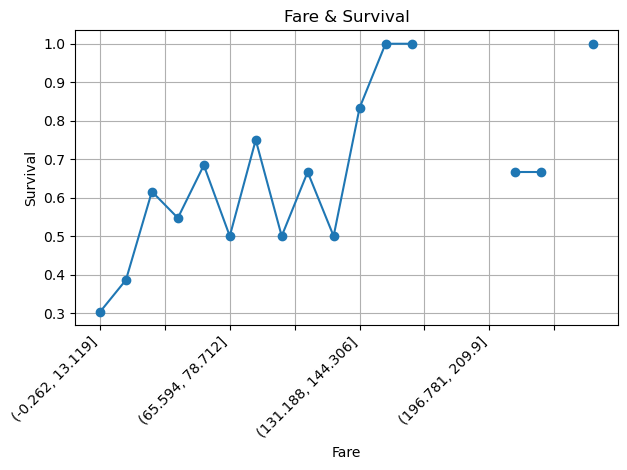

In [346]:
data = data[data['fare_per_prsn'] < 300].copy()
data['fare_bin'] = pd.cut(data['fare_per_prsn'], bins=20)

fare_survival = data.groupby('fare_bin', observed=False)['survived'].mean()

fare_survival.plot(kind='line', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Fare & Survival')
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.grid()
plt.tight_layout()
plt.show()

### –ò—Å—Ö–æ–¥—è –∏–∑ –¥–∞–Ω–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤—Å—ë –∂–µ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è —Ü–µ–Ω–∞ –Ω–∞ –±–∏–ª–µ—Ç –¥–∞–≤–∞–ª–∞ –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –Ω–∞ –≤—ã–∂–∏–≤–∞–Ω–∏–µ.

# Name & Survived

In [347]:
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare cabin  ... boat   body  \
0  29.0000      0      0   24160  211.3375    B5  ...    2    NaN   
1   0.9167      1      2  113781  151.5500   C22  ...   11    NaN   
2   2.0000      1      2  113781  151.5500   C22  ...  NaN    NaN   
3  30.0000      1      2  113781  151.5500   C22  ...  NaN  135.0   
4  25.0000      1      2  113781  151.5500   C22  ...  NaN    NaN   

                         home.dest         age_group cabin_tmp cabin_known  \
0                     St Louis, MO  (20.125, 40.083]       ABC           1   
1  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC           1   
2  Montreal, PQ / Chesterville, ON  (0.0869, 20.125]       ABC           1   
3  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC           1   
4  Montreal, PQ / Chesterville, ON  (20.125, 40.083]       ABC           1   

           fare_bin family_size  alone  fare_per_prsn  
0  (209.9, 223.019]           1   True       211.3375  
1  (26.238, 39.356]           4  False        37.8875  
2  (26.238, 39.356]           4  False        37.8875  
3  (26.238, 39.356]           4  False        37.8875  
4  (26.238, 39.356]           4  False        37.8875  

[5 rows x 21 columns]

In [348]:
data['title'] = data['name'].str.extract(' ([A-Za-z]+)\.')

In [349]:
pd.crosstab(data['title'], data['sex'])

sex       female  male
title                 
Capt           0     1
Col            0     4
Countess       1     0
Don            0     1
Dona           1     0
Dr             1     7
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    61
Miss         259     0
Mlle           2     0
Mme            1     0
Mr             0   754
Mrs          196     0
Ms             2     0
Rev            0     8
Sir            0     1

In [350]:
data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col', \
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
data['title'] = data['title'].replace('Mlle', 'Miss')
data['title'] = data['title'].replace('Ms', 'Miss')
data['title'] = data['title'].replace('Mme', 'Mrs')
    
data[['title', 'survived']].groupby(['title'], as_index=False).sum()

title  survived
0  Master        31
1    Miss       178
2      Mr       121
3     Mrs       155
4   Other        11

### –í –¥–∞–Ω–Ω–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–∏ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞–Ω–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ç–µ—Å–Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω–Ω–∞ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `Sex`, —Ç–∞–∫ –∫–∞–∫ –≤—ã–≤–æ–¥ –∏–∑ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω, —á—Ç–æ —Ç–∞–∫ –∏–ª–∏ –∏–Ω–∞—á–µ –≤—Å—ë —Å–≤–æ–¥–∏—Ç—Å—è –∫ —Ç–æ–º—É, —á—Ç–æ –∂–µ–Ω—â–∏–Ω—ã –≤—ã–∂–∏–≤–∞–ª–∏ –±–æ–ª—å—à–µ —á–µ–º –º—É–∂—á–∏–Ω—ã, –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–æ–∂–µ–Ω–∏—è –≤ –æ–±—â–µ—Å—Ç–≤–µ. –ü–æ—ç—Ç–æ–º—É, –¥–∞–Ω–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –º–æ–∂–Ω–æ –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤ –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª—è—Ö, –≤–µ–¥—å –æ–Ω–∞ –ø—Ä—è–º–æ–ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `Sex`.

# Survived

In [351]:
data['survived'].info()

<class 'pandas.core.series.Series'>
Index: 1304 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype
--------------  -----
1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


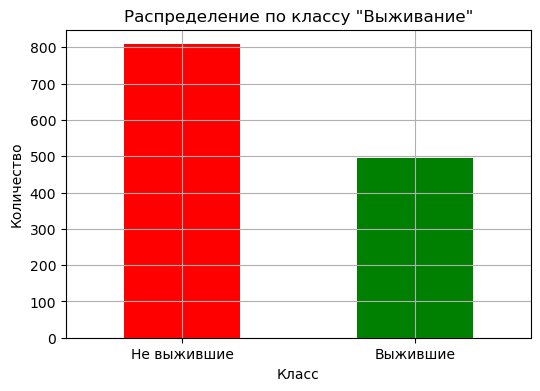

In [352]:
plt.figure(figsize=(6, 4))
data['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Å—É "–í—ã–∂–∏–≤–∞–Ω–∏–µ"')
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.xticks([0, 1], ['–ù–µ –≤—ã–∂–∏–≤—à–∏–µ', '–í—ã–∂–∏–≤—à–∏–µ'], rotation=0)
plt.grid(True)
plt.show()

`survived` - –ò–∑ –¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –≤—ã–≤–æ–¥ –ø–æ–ª—É—á–∏–ª–∏ –ø—Ä–æ—Å—Ç–æ–π, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∂–∏–≤—à–∏—Ö –º–µ–Ω—å—à–µ.

# *–í—ã–≤–æ–¥ –∏–∑ –ø—Ä–æ–≤–µ–¥—ë–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –Ω–∞—à–µ–º—É —Ç–∞—Ä–≥–µ—Ç—É:*
- `name`  : –î–∞–Ω–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø—Ä—è–º–æ–ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –∫ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `sex`, –≤ —Å–ª–µ–¥—Å—Ç–≤–∏–∏ —á–µ–≥–æ, –µ—ë –º–æ–∂–Ω–æ —Å–±—Ä–æ—Å–∏—Ç—å.
- `home.dest`  : –ù–µ –¥–∞—ë—Ç –Ω–∞–º –æ—Å–æ–±–æ –Ω–∏—á–µ–≥–æ, –∫—Ä–æ–º–µ –ø–æ–Ω–∏–º–∞–Ω–∏—è –æ—Ç–∫—É–¥–∞ –∏ –∫—É–¥–∞ –Ω–∞–ø—Ä—è–≤–ª—è–ª—Å—è –ø–∞—Å—Å–∞–∂–∏—Ä. –ï—ë —Ç–æ–∂–µ –º–æ–∂–Ω–æ –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –Ω–∞—à–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞.
- `body` , `boat`  : –í –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ü–æ—ç—Ç–æ–º—É –∏—Ö –ø—Ä–æ—â–µ —Å–±—Ä–æ—Å–∏—Ç—å, —á–µ–º –∫–∞–∫ –ª–∏–±–æ –∞–ø–ø–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å –Ω–∏–º–∏.
- `ticket`  : –ú–∞–ª–æ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π, –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∏ —à—É–º–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫. –ù–µ –∏–º–µ–µ—Ç –ª–æ–≥–∏—á–µ—Å–∫–∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π —Å–≤—è–∑–∏ —Å —à–∞–Ω—Å–æ–º –Ω–∞ –≤—ã–∂–∏–≤–∞–Ω–∏–µ. –ù–∞–¥–ª–µ–∂–∏—Ç —Å–±—Ä–æ—Å—É.
- `pclass`  : –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∫–æ—Ç–æ—Ä–∞—è –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –∏–º–µ–µ—Ç –±–æ–ª—å—à—É—é —Å–≤—è–∑—å —Å —à–∞–Ω—Å–æ–º –Ω–∞ –≤—ã–∂–∏–≤–∞–Ω–∏–µ.
- `sex`  : –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å—é —Å —à–∞–Ω—Å–æ–º –Ω–∞ –≤—ã–∂–∏–≤–∞–Ω–∏–µ.
- `parch` , `sibsp`  : –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–æ—Ç–æ—Ä—ã–µ —Ç–æ–∂–µ –∏–º–µ—é –Ω–µ –ø–ª–æ—Ö—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å —Å —à–∞–Ω—Å–æ–º –Ω–∞ –≤—ã–∂–∏–≤–∞–Ω–∏–µ.
- `cabin`  : –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –≤ –∫–æ—Ç–æ—Ä–æ–π –º–Ω–æ–≥–æ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ –Ω–µ —Å–º–æ—Ç—Ä—è –Ω–∞ —ç—Ç–æ —Å –Ω–µ–π –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è —Å–≤—è–∑—å —Å —Ç–∞—Ä–≥–µ—Ç–æ–º.
- `age`  : –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Å –Ω–µ–π –º–æ–∂–Ω–æ –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å. –°–≤—è–∑—å —Å –Ω–∞—à–∏–º —Ç–∞—Ä–≥–µ—Ç–æ–º –∏–º–µ–µ—Ç—Å—è.
- `embarked`  : –í –¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è —Å–≤—è–∑—å —Å –Ω–∞—à–∏–º —Ç–∞—Ä–≥–µ—Ç–æ–º.
- `fare`  : –í –¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ç–æ–∂–µ –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å —Å –Ω–∞—à–∏–º —Ç–∞—Ä–≥–µ—Ç–æ–º.

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### –†–∞–∑–∞–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π —Å–µ—Ç

In [353]:
cols = [
    'pclass',
    'survived',
    'sex',
    'age',
    'cabin_known',
    'fare_per_prsn',
    'alone',
    'embarked'
]

data = data[cols]

In [354]:
data.head()

pclass  survived     sex      age  cabin_known  fare_per_prsn  alone  \
0       1         1  female  29.0000            1       211.3375   True   
1       1         1    male   0.9167            1        37.8875  False   
2       1         0  female   2.0000            1        37.8875  False   
3       1         0    male  30.0000            1        37.8875  False   
4       1         0  female  25.0000            1        37.8875  False   

  embarked  
0        S  
1        S  
2        S  
3        S  
4        S

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ PipeLine

In [355]:
data.isnull().mean()

pclass           0.000000
survived         0.000000
sex              0.000000
age              0.201687
cabin_known      0.000000
fare_per_prsn    0.000000
alone            0.000000
embarked         0.001534
dtype: float64

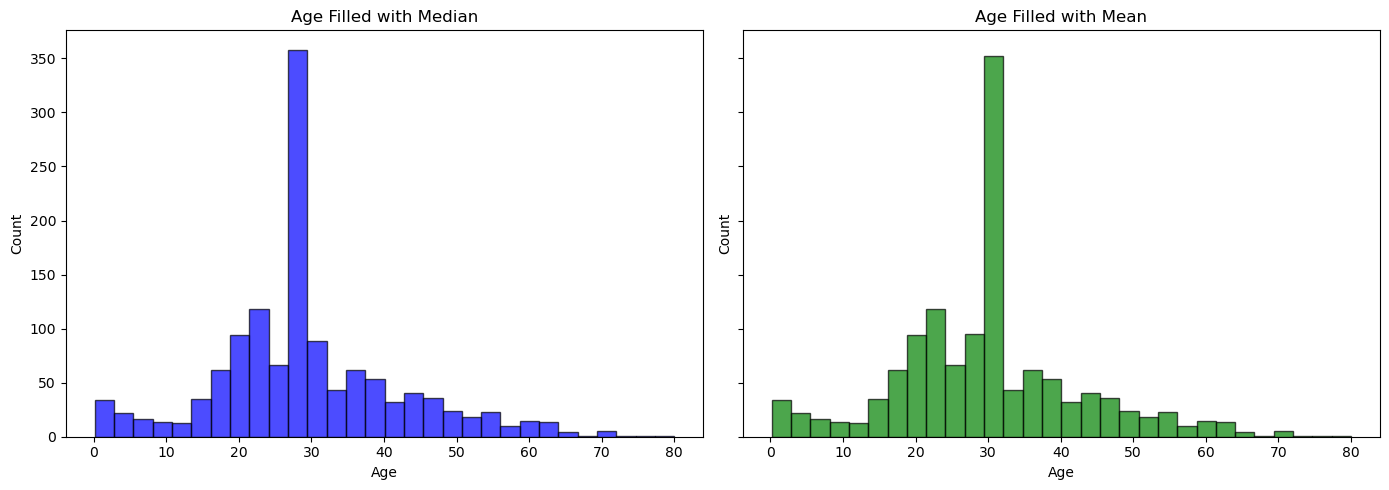

In [356]:
ages_median = data['age'].fillna(data['age'].median())
ages_mean = data['age'].fillna(data['age'].mean())

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# –ú–µ–¥–∏–∞–Ω–∞
axes[0].hist(ages_median, bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Filled with Median')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# –°—Ä–µ–¥–Ω–µ–µ
axes[1].hist(ages_mean, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title('Age Filled with Mean')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

- `age` - –ò—Å—Ö–æ–¥—è –∏–∑ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –ø–æ –¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –Ω–µ—Ç –æ—Å–æ–±–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –≤ —Ç–æ–º, –∫–∞–∫–æ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ –¥–ª—è –∑–∞–º–Ω–µ–Ω—ã –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
- `embarked` - –í –¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–æ—Å—Ç–æ –∑–∞–º–µ–Ω–∏–ª–∏ –Ω–∞ `mode` , —Ç–∞–∫ –∫–∞–∫ –ø—Ä–æ—Ü–µ–Ω—Ç –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—á–µ–Ω—å –º–∞–ª, –ø–æ—ç—Ç–æ–º—É –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å     —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –∑–∞–º–µ–Ω—ã –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         1304 non-null   int64  
 1   survived       1304 non-null   int64  
 2   sex            1304 non-null   object 
 3   age            1041 non-null   float64
 4   cabin_known    1304 non-null   int64  
 5   fare_per_prsn  1304 non-null   float64
 6   alone          1304 non-null   bool   
 7   embarked       1302 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 82.8+ KB


### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π —Å–µ—Ç

In [358]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),
    data['survived'],
    test_size = 0.3,
    random_state = 0
)

### PipeLine

In [360]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features = ['age']
categorical_features = ['sex', 'alone', 'embarked']

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())                 
])

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –≤ ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# –°–ª–æ–≤–∞—Ä—å —Å –º–æ–¥–µ–ª—è–º–∏
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=0))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=0))
    ]),
    'SVC': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=0))
    ]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=0))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=0))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(eval_metric='logloss', random_state=0))
    ]),
    'Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è GridSearchCV
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.01, 0.1, 1]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    'Naive Bayes': {}
}

best_models = {}
results = []

cv = KFold(n_splits=5, shuffle=True, random_state=0)

for name, pipeline in models.items():
    print(f'–¢—Ä–µ–Ω–∏—Ä—É–µ–º {name}...')
    grid = GridSearchCV(pipeline, param_grids.get(name, {}), cv=cv, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    
    # –†–∞—Å—á—ë—Ç –º–µ—Ç—Ä–∏–∫
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])

    results.append((name, acc, precision, recall, f1, roc_auc, grid.best_params_))
    print(f'{name}: Accuracy = {acc:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}, ROC AUC = {roc_auc:.4f}')

# –î–ª—è –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ —Å–µ—Ç–∞
# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –æ—Ç –±–æ–ª—å—à–µ–≥–æ –∫ –º–µ–Ω—å—à–µ–º—É
sorted_idx_acc_train = np.argsort(-train_accuracies)
sorted_idx_prec_train = np.argsort(-train_precisions)
sorted_idx_rec_train = np.argsort(-train_recalls)
sorted_idx_f1_train = np.argsort(-train_f1_scores)
sorted_idx_roc_train = np.argsort(-train_roc_aucs)

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Accuracy
axes[0].barh(train_model_names[sorted_idx_acc_train], train_accuracies[sorted_idx_acc_train], color='green')
axes[0].set_title('Train Accuracy')
for i, v in enumerate(train_accuracies[sorted_idx_acc_train]):
    axes[0].text(v + 0.01, i, f"{v:.2f}", va='center')

# Precision
axes[1].barh(train_model_names[sorted_idx_prec_train], train_precisions[sorted_idx_prec_train], color='blue')
axes[1].set_title('Train Precision')
for i, v in enumerate(train_precisions[sorted_idx_prec_train]):
    axes[1].text(v + 0.01, i, f"{v:.2f}", va='center')

# Recall
axes[2].barh(train_model_names[sorted_idx_rec_train], train_recalls[sorted_idx_rec_train], color='orange')
axes[2].set_title('Train Recall')
for i, v in enumerate(train_recalls[sorted_idx_rec_train]):
    axes[2].text(v + 0.01, i, f"{v:.2f}", va='center')

# F1 Score
axes[3].barh(train_model_names[sorted_idx_f1_train], train_f1_scores[sorted_idx_f1_train], color='purple')
axes[3].set_title('Train F1 Score')
for i, v in enumerate(train_f1_scores[sorted_idx_f1_train]):
    axes[3].text(v + 0.01, i, f"{v:.2f}", va='center')

# –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω—é—é –æ—Å—å
fig.delaxes(axes[4])

# ROC-AUC
axes[5].barh(train_model_names[sorted_idx_roc_train], train_roc_aucs[sorted_idx_roc_train], color='red')
axes[5].set_title('Train ROC AUC')
for i, v in enumerate(train_roc_aucs[sorted_idx_roc_train]):
    axes[5].text(v + 0.01, i, f"{v:.2f}", va='center')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Å–µ–π
for ax in [axes[i] for i in [0, 1, 2, 3, 5]]:
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
    ax.grid(True)

# –ó–∞–≥–æ–ª–æ–≤–æ–∫
plt.suptitle("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º (–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π —Å–µ—Ç)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
best_train_idx = np.argmax(train_accuracies)
best_train_model_name = train_results[best_train_idx][0]

print(f"\n –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º —Å–µ—Ç–µ: {best_train_model_name}")
print(f"Accuracy: {train_results[best_train_idx][1]:.3f}, Precision: {train_results[best_train_idx][2]:.3f}, "
      f"Recall: {train_results[best_train_idx][3]:.3f}, F1 Score: {train_results[best_train_idx][4]:.3f}, "
      f"ROC AUC: {train_results[best_train_idx][5]:.3f}")

# –î–ª—è –¢–µ—Å—Ç–æ–≤–æ–≥–æ —Å–µ—Ç–∞
accuracies = np.array(accuracies)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)
roc_aucs = np.array(roc_aucs)
model_names = np.array(model_names)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –æ—Ç –±–æ–ª—å—à–µ–≥–æ –∫ –º–µ–Ω—å—à–µ–º—É
sorted_idx_acc = np.argsort(-accuracies)
sorted_idx_prec = np.argsort(-precisions)
sorted_idx_rec = np.argsort(-recalls)
sorted_idx_f1 = np.argsort(-f1_scores)
sorted_idx_roc = np.argsort(-roc_aucs)

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Accuracy
axes[0].barh(model_names[sorted_idx_acc], accuracies[sorted_idx_acc], color='green')
axes[0].set_title('Accuracy')
for i, v in enumerate(accuracies[sorted_idx_acc]):
    axes[0].text(v + 0.01, i, f"{v:.2f}", va='center')

# Precision
axes[1].barh(model_names[sorted_idx_prec], precisions[sorted_idx_prec], color='blue')
axes[1].set_title('Precision')
for i, v in enumerate(precisions[sorted_idx_prec]):
    axes[1].text(v + 0.01, i, f"{v:.2f}", va='center')

# Recall
axes[2].barh(model_names[sorted_idx_rec], recalls[sorted_idx_rec], color='orange')
axes[2].set_title('Recall')
for i, v in enumerate(recalls[sorted_idx_rec]):
    axes[2].text(v + 0.01, i, f"{v:.2f}", va='center')

# F1 Score
axes[3].barh(model_names[sorted_idx_f1], f1_scores[sorted_idx_f1], color='purple')
axes[3].set_title('F1 Score')
for i, v in enumerate(f1_scores[sorted_idx_f1]):
    axes[3].text(v + 0.01, i, f"{v:.2f}", va='center')

# –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω—é—é –æ—Å—å
fig.delaxes(axes[4])

# ROC-AUC
axes[5].barh(model_names[sorted_idx_roc], roc_aucs[sorted_idx_roc], color='red')
axes[5].set_title('ROC AUC')
for i, v in enumerate(roc_aucs[sorted_idx_roc]):
    axes[5].text(v + 0.01, i, f"{v:.2f}", va='center')

for ax in [axes[i] for i in [0, 1, 2, 3, 5]]:
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
    ax.grid(True)

plt.suptitle("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º (–¢–µ—Å—Ç–æ–≤—ã–π —Å–µ—Ç)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# –í—ã–≤–æ–¥–∏–º –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
best_idx = np.argmax(accuracies)
best_model_name, best_acc, best_precision, best_recall, best_f1, best_roc_auc, best_params = results[best_idx]

print(f"\n –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_model_name}")
print(f"Accuracy: {best_acc:.3f}, Precision: {best_precision:.3f}, Recall: {best_recall:.3f}, F1 Score: {best_f1:.3f}, ROC AUC: {best_roc_auc:.3f}")
print(f"–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {best_params}")

–¢—Ä–µ–Ω–∏—Ä—É–µ–º Logistic Regression...
Logistic Regression: Accuracy = 0.8036, Precision = 0.7313, Recall = 0.7050, F1 = 0.7179, ROC AUC = 0.8013
–¢—Ä–µ–Ω–∏—Ä—É–µ–º Random Forest...
Random Forest: Accuracy = 0.8087, Precision = 0.7222, Recall = 0.7482, F1 = 0.7350, ROC AUC = 0.8254
–¢—Ä–µ–Ω–∏—Ä—É–µ–º SVC...
SVC: Accuracy = 0.8036, Precision = 0.7313, Recall = 0.7050, F1 = 0.7179, ROC AUC = 0.8076
–¢—Ä–µ–Ω–∏—Ä—É–µ–º KNN...
KNN: Accuracy = 0.7959, Precision = 0.7323, Recall = 0.6691, F1 = 0.6992, ROC AUC = 0.8292
–¢—Ä–µ–Ω–∏—Ä—É–µ–º Decision Tree...
Decision Tree: Accuracy = 0.8010, Precision = 0.7194, Recall = 0.7194, F1 = 0.7194, ROC AUC = 0.8040
–¢—Ä–µ–Ω–∏—Ä—É–µ–º Gradient Boosting...
Gradient Boosting: Accuracy = 0.8087, Precision = 0.7319, Recall = 0.7266, F1 = 0.7292, ROC AUC = 0.8231
–¢—Ä–µ–Ω–∏—Ä—É–µ–º XGBoost...
XGBoost: Accuracy = 0.8061, Precision = 0.7234, Recall = 0.7338, F1 = 0.7286, ROC AUC = 0.8251
–¢—Ä–µ–Ω–∏—Ä—É–µ–º Naive Bayes...
Naive Bayes: Accuracy = 0.7959, Precisi


 –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º —Å–µ—Ç–µ: Gradient Boosting
Accuracy: 0.794, Precision: 0.751, Recall: 0.709, F1 Score: 0.729, ROC AUC: 0.850



 –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Random Forest
Accuracy: 0.809, Precision: 0.722, Recall: 0.748, F1 Score: 0.735, ROC AUC: 0.825
–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}


- *–ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è. –ü–æ –∏—Ç–æ–≥—É –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤—ã—à–ª–∞ `Random Forest`*

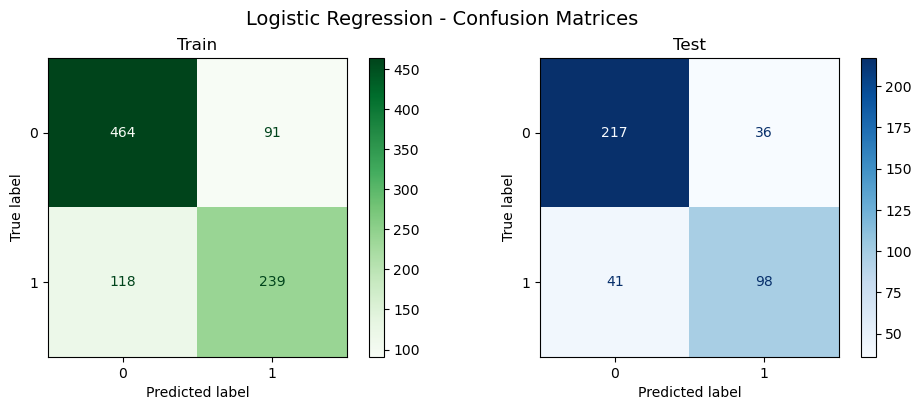

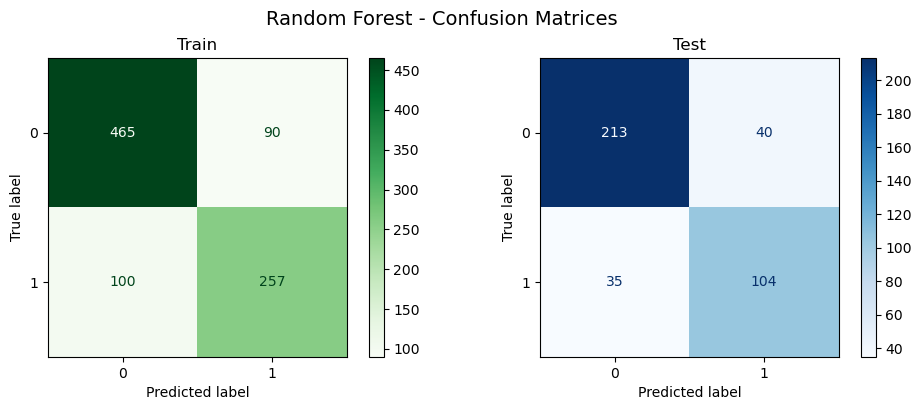

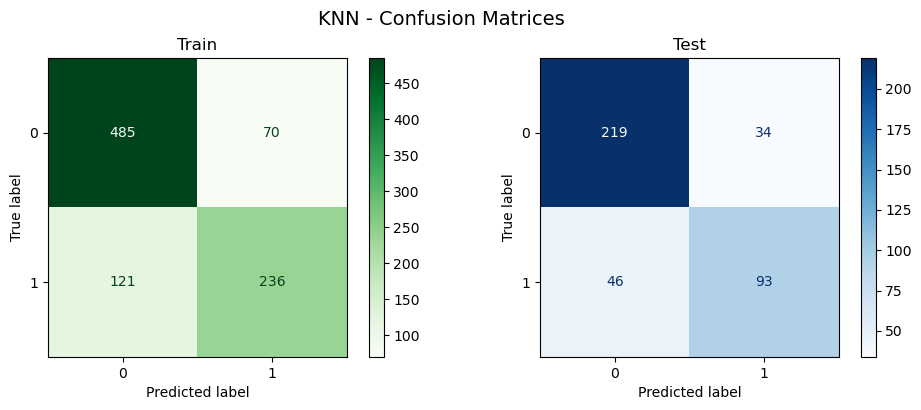

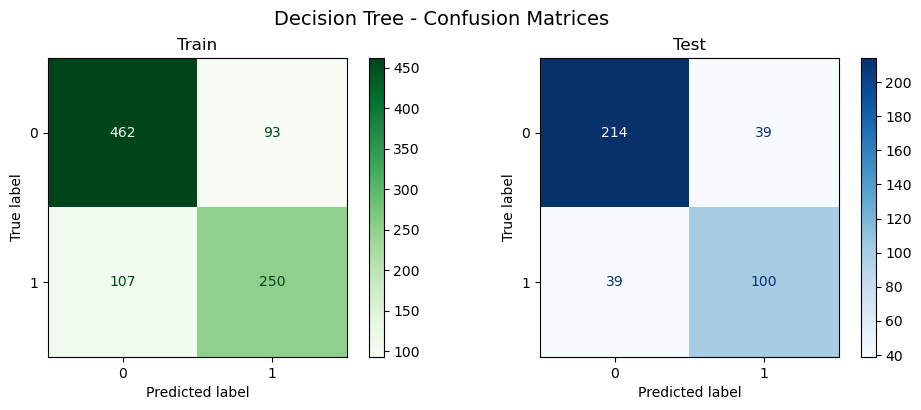

In [361]:
for name, model in best_models.items():
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{name} - Confusion Matrices', fontsize=14)

    # Train
    y_train_pred = model.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_train_pred, ax=axes[0], cmap='Greens'
    )
    axes[0].set_title("Train")

    # Test
    y_test_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_test_pred, ax=axes[1], cmap='Blues'
    )
    axes[1].set_title("Test")

    plt.tight_layout()
    plt.show()

In [362]:
# –°–ø–∏—Å–æ–∫ –¥–ª—è —Å–±–æ—Ä–∞ –≤—Å–µ—Ö –º–µ—Ç—Ä–∏–∫
report_rows = []

# –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª–∏
for name, model in best_models.items():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # –ü–æ–ª—É—á–∞–µ–º classification_report –≤ –≤–∏–¥–µ —Å–ª–æ–≤–∞—Ä—è
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # –î–ª—è –∫–∞–∂–¥–æ–≥–æ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ 'weighted avg'
    for label in ['0', '1', 'weighted avg']:
        row = {
            'Model': name,
            'Class': label,
            'Train Precision': train_report[label]['precision'],
            'Train Recall': train_report[label]['recall'],
            'Train F1-Score': train_report[label]['f1-score'],
            'Test Precision': test_report[label]['precision'],
            'Test Recall': test_report[label]['recall'],
            'Test F1-Score': test_report[label]['f1-score'],
        }
        report_rows.append(row)

# –°–æ–∑–¥–∞—ë–º DataFrame –∏ –≤—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
report_df = pd.DataFrame(report_rows)
pd.set_option("display.max_rows", None)
display(report_df.round(3))

Model         Class  Train Precision  Train Recall  \
0   Logistic Regression             0            0.797         0.836   
1   Logistic Regression             1            0.724         0.669   
2   Logistic Regression  weighted avg            0.769         0.771   
3         Random Forest             0            0.823         0.838   
4         Random Forest             1            0.741         0.720   
5         Random Forest  weighted avg            0.791         0.792   
6                   SVC             0            0.797         0.836   
7                   SVC             1            0.724         0.669   
8                   SVC  weighted avg            0.769         0.771   
9                   KNN             0            0.800         0.874   
10                  KNN             1            0.771         0.661   
11                  KNN  weighted avg            0.789         0.791   
12        Decision Tree             0            0.812         0.832   
13        Decision Tree             1            0.729         0.700   
14        Decision Tree  weighted avg            0.779         0.781   
15    Gradient Boosting             0            0.819         0.849   
16    Gradient Boosting             1            0.751         0.709   
17    Gradient Boosting  weighted avg            0.792         0.794   
18              XGBoost             0            0.813         0.836   
19              XGBoost             1            0.733         0.700   
20              XGBoost  weighted avg            0.782         0.783   
21          Naive Bayes             0            0.806         0.818   
22          Naive Bayes             1            0.711         0.695   
23          Naive Bayes  weighted avg            0.769         0.770   

    Train F1-Score  Test Precision  Test Recall  Test F1-Score  
0            0.816           0.841        0.858          0.849  
1            0.696           0.731        0.705          0.718  
2            0.769           0.802        0.804          0.803  
3            0.830           0.859        0.842          0.850  
4            0.730           0.722        0.748          0.735  
5            0.791           0.810        0.809          0.809  
6            0.816           0.841        0.858          0.849  
7            0.696           0.731        0.705          0.718  
8            0.769           0.802        0.804          0.803  
9            0.835           0.826        0.866          0.846  
10           0.712           0.732        0.669          0.699  
11           0.787           0.793        0.796          0.794  
12           0.822           0.846        0.846          0.846  
13           0.714           0.719        0.719          0.719  
14           0.780           0.801        0.801          0.801  
15           0.834           0.850        0.854          0.852  
16           0.729           0.732        0.727          0.729  
17           0.793           0.808        0.809          0.809  
18           0.824           0.853        0.846          0.849  
19           0.716           0.723        0.734          0.729  
20           0.782           0.807        0.806          0.806  
21           0.812           0.853        0.826          0.839  
22           0.703           0.701        0.741          0.720  
23           0.769           0.799        0.796          0.797